# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/tensorflow.git

Cloning into 'tensorflow'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 60311 (delta 32), reused 37 (delta 23), pack-reused 60260
Receiving objects: 100% (60311/60311), 442.46 MiB | 14.79 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Checking out files: 100% (60225/60225), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [1]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [2]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [4]:
session = tf.Session()

# SVM para problemas de regresión

$$loss = \frac{1}{n}\sum_{i=1}^n\max(0,|y_i-(Ax_i+b)|-\varepsilon)$$

- $\varepsilon$: la mitad del margen, que fuerza a que la función loss sea cero para todos los puntos dentro del corredor

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from sklearn import datasets

In [20]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

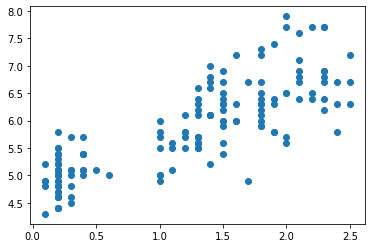

In [21]:
plt.plot(x_vals, y_vals, 'o')
plt.show()

In [22]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [23]:
batch_size = 50

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [24]:
model_output = tf.add(tf.matmul(x_data,A), b)

In [25]:
epsilon = tf.constant([0.5])
loss = tf.reduce_mean(tf.maximum(0.0, tf.subtract(tf.abs(tf.subtract(model_output, y_target)), epsilon)))

In [26]:
my_optim = tf.train.GradientDescentOptimizer(0.05)
train_step = my_optim.minimize(loss)

init = tf.global_variables_initializer()
session.run(init)

In [27]:
train_loss = []
test_loss = []

for i in range(300):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    
    train_loss_temp = session.run(loss, feed_dict = {x_data: np.transpose([x_vals_train]),
                                                     y_target: np.transpose([y_vals_train])})
    train_loss.append(train_loss_temp)
    
    test_loss_temp = session.run(loss, feed_dict= {x_data: np.transpose([x_vals_test]),
                                                   y_target: np.transpose([y_vals_test])})
    test_loss.append(test_loss_temp)
    
    if(i+1)%50==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+", b = "+str(session.run(b)))
        print("Loss Train = "+str(train_loss_temp)+ ", Loss Test = "+str(test_loss_temp))

Paso #50, A = [[1.1618584]], b = [[2.8788617]]
Loss Train = 1.1056172, Loss Test = 0.96349585
Paso #100, A = [[1.5682586]], b = [[3.870862]]
Loss Train = 0.18126054, Loss Test = 0.27893868
Paso #150, A = [[1.3119589]], b = [[4.232863]]
Loss Train = 0.10651733, Loss Test = 0.16667838
Paso #200, A = [[1.2148585]], b = [[4.390862]]
Loss Train = 0.090841725, Loss Test = 0.13677004
Paso #250, A = [[1.0945586]], b = [[4.4568615]]
Loss Train = 0.085250825, Loss Test = 0.11030256
Paso #300, A = [[1.0547585]], b = [[4.5518627]]
Loss Train = 0.07985409, Loss Test = 0.104736075


In [28]:
[[slope]] = session.run(A)
[[y_intercept]] = session.run(b)
[width] = session.run(epsilon)

best_fit = []
best_fit_upper = []
best_fit_lower = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
    best_fit_upper.append(slope*i+y_intercept+width)
    best_fit_lower.append(slope*i+y_intercept-width)

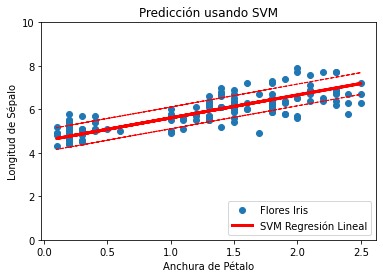

In [29]:
plt.plot(x_vals, y_vals, 'o', label = "Flores Iris")
plt.plot(x_vals, best_fit, 'r-', label = "SVM Regresión Lineal", linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=1)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=1)
plt.ylim([0,10])
plt.legend(loc="lower right")
plt.xlabel("Anchura de Pétalo")
plt.ylabel("Longitud de Sépalo")
plt.title("Predicción usando SVM")
plt.show()

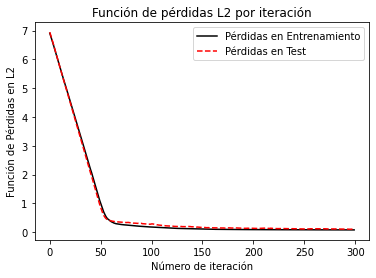

In [30]:
plt.plot(train_loss, 'k-', label = "Pérdidas en Entrenamiento")
plt.plot(test_loss, 'r--', label = "Pérdidas en Test")
plt.title("Función de pérdidas L2 por iteración")
plt.xlabel("Número de iteración")
plt.ylabel("Función de Pérdidas en L2")
plt.legend(loc="upper right")
plt.show()

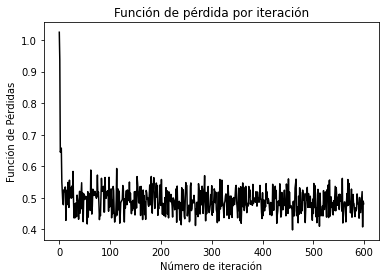

In [19]:
plt.plot(loss_vect, 'k-')
plt.title("Función de pérdida por iteración")
plt.xlabel("Número de iteración")
plt.ylabel("Función de Pérdidas")
plt.show()